In [2]:
# import packages
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve, auc, average_precision_score


# NN packages
import os
import time

import scipy as sci
import scipy.io as sio

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler


import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow import keras


from numpy.random import seed
seed(100)

from IPython.display import clear_output

# Exploratory Data Analysis

In [3]:
raw = pd.read_csv(r'accepted_2007_to_2018Q4.csv')

In [4]:
accepted_raw = raw.copy()

In [5]:
full_cols = accepted_raw.columns.tolist()
np.reshape(full_cols[:50],(10,5))

array([['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv'],
       ['term', 'int_rate', 'installment', 'grade', 'sub_grade'],
       ['emp_title', 'emp_length', 'home_ownership', 'annual_inc',
        'verification_status'],
       ['issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc'],
       ['purpose', 'title', 'zip_code', 'addr_state', 'dti'],
       ['delinq_2yrs', 'earliest_cr_line', 'fico_range_low',
        'fico_range_high', 'inq_last_6mths'],
       ['mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
        'pub_rec', 'revol_bal'],
       ['revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
        'out_prncp_inv'],
       ['total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
        'total_rec_int', 'total_rec_late_fee'],
       ['recoveries', 'collection_recovery_fee', 'last_pymnt_d',
        'last_pymnt_amnt', 'next_pymnt_d']], dtype='<U23')

In [6]:
np.reshape(full_cols[51:101],(10,5))

array([['last_fico_range_high', 'last_fico_range_low',
        'collections_12_mths_ex_med', 'mths_since_last_major_derog',
        'policy_code'],
       ['application_type', 'annual_inc_joint', 'dti_joint',
        'verification_status_joint', 'acc_now_delinq'],
       ['tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_act_il',
        'open_il_12m'],
       ['open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util',
        'open_rv_12m'],
       ['open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim',
        'inq_fi'],
       ['total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths',
        'avg_cur_bal', 'bc_open_to_buy'],
       ['bc_util', 'chargeoff_within_12_mths', 'delinq_amnt',
        'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op'],
       ['mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc',
        'mths_since_recent_bc', 'mths_since_recent_bc_dlq'],
       ['mths_since_recent_inq', 'mths_since_recent_revol_delinq',
        'num_accts_ever_120_pd', 'num_actv_bc

In [7]:
np.reshape(full_cols[101:151],(10,5))

array([['num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
        'num_tl_30dpd', 'num_tl_90g_dpd_24m'],
       ['num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75',
        'pub_rec_bankruptcies', 'tax_liens'],
       ['tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
        'total_il_high_credit_limit', 'revol_bal_joint'],
       ['sec_app_fico_range_low', 'sec_app_fico_range_high',
        'sec_app_earliest_cr_line', 'sec_app_inq_last_6mths',
        'sec_app_mort_acc'],
       ['sec_app_open_acc', 'sec_app_revol_util', 'sec_app_open_act_il',
        'sec_app_num_rev_accts', 'sec_app_chargeoff_within_12_mths'],
       ['sec_app_collections_12_mths_ex_med',
        'sec_app_mths_since_last_major_derog', 'hardship_flag',
        'hardship_type', 'hardship_reason'],
       ['hardship_status', 'deferral_term', 'hardship_amount',
        'hardship_start_date', 'hardship_end_date'],
       ['payment_plan_start_date', 'hardship_length', 'hardship_dpd',
        'hardshi

In [8]:
accepted_raw.describe()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_low,...,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term
count,0.0,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260664e+06,2.258957e+06,2.260639e+06,2.260668e+06,...,10917.0,10917.000000,10917.0,10917.000000,8651.000000,10917.000000,10917.000000,34246.000000,34246.000000,34246.000000
mean,NaN,1.504693e+04,1.504166e+04,1.502344e+04,1.309283e+01,4.458068e+02,7.799243e+04,1.882420e+01,3.068792e-01,6.985882e+02,...,3.0,155.045981,3.0,13.743886,454.798089,11636.883942,193.994321,5010.664267,47.780365,13.191322
std,NaN,9.190245e+03,9.188413e+03,9.192332e+03,4.832138e+00,2.671735e+02,1.126962e+05,1.418333e+01,8.672303e-01,3.301038e+01,...,0.0,129.040594,0.0,9.671178,375.385500,7625.988281,198.629496,3693.122590,7.311822,8.159980
min,NaN,5.000000e+02,5.000000e+02,0.000000e+00,5.310000e+00,4.930000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,6.100000e+02,...,3.0,0.640000,3.0,0.000000,1.920000,55.730000,0.010000,44.210000,0.200000,0.000000
25%,NaN,8.000000e+03,8.000000e+03,8.000000e+03,9.490000e+00,2.516500e+02,4.600000e+04,1.189000e+01,0.000000e+00,6.750000e+02,...,3.0,59.440000,3.0,5.000000,175.230000,5627.000000,44.440000,2208.000000,45.000000,6.000000
50%,NaN,1.290000e+04,1.287500e+04,1.280000e+04,1.262000e+01,3.779900e+02,6.500000e+04,1.784000e+01,0.000000e+00,6.900000e+02,...,3.0,119.140000,3.0,15.000000,352.770000,10028.390000,133.160000,4146.110000,45.000000,14.000000
75%,NaN,2.000000e+04,2.000000e+04,2.000000e+04,1.599000e+01,5.933200e+02,9.300000e+04,2.449000e+01,0.000000e+00,7.150000e+02,...,3.0,213.260000,3.0,22.000000,620.175000,16151.890000,284.190000,6850.172500,50.000000,18.000000
max,NaN,4.000000e+04,4.000000e+04,4.000000e+04,3.099000e+01,1.719830e+03,1.100000e+08,9.990000e+02,5.800000e+01,8.450000e+02,...,3.0,943.940000,3.0,37.000000,2680.890000,40306.410000,1407.860000,33601.000000,521.350000,181.000000


# Pre-processing the data

In [9]:
# Feature engineering and grouping

def feature_engineering(df):

    # FICO score range: A range of scores used to assess the borrower's creditworthiness.
    df['fico_avg'] = (df['fico_range_low'] + df['fico_range_high']) / 2

    # Annual income to loan installment ratio
    df['payment_inc_ratio'] = df['annual_inc'] / (df['installment'] * 12)

    # Encoding features
    df['delinq_2yrs'] = (df['delinq_2yrs'] == 0).astype(int)
    df['inq_last_6mths'] = (df['inq_last_6mths'] == 0).astype(int)   
    df['pub_rec'] = (df['pub_rec'] >= 2).astype(int)

    # Engineering bins for groups
    df['open_acc_grp'] = pd.cut(df['open_acc'], bins=[-1, 10, 20, 30, 40, 50, float('inf')], labels=['0-10', '10-20', '20-30', '30-40', '40-50', '>50']).astype(str)
    df['annual_inc_grp'] = pd.cut(df['annual_inc'], bins=[-1, 50000, 100000, 150000, 200000, 250000, float('inf')], labels=['0-50k', '50k-100k', '100k-150k', '150k-200k', '200k-250k', '>250k']).astype(str)
    df['dti_grp'] = pd.cut(df['dti'], bins=[-1, 10, 20, 30, 40, 50, float('inf')], labels=['0-10', '10-20', '20-30', '30-40', '40-50', '>50']).astype(str)
    return df


accepted_raw = feature_engineering(accepted_raw)

In [10]:
# Drop rows that do not meet criteria 
crit = ['Does not meet the credit policy. Status:Fully Paid', 'Does not meet the credit policy. Status:Charged Off']
accepted_raw = accepted_raw[~accepted_raw['loan_status'].isin(crit)]

In [11]:
# Drop all columns with more than 75% NaN values
threshold = len(accepted_raw) * 0.75
accepted_raw = accepted_raw.dropna(thresh = threshold, axis = 1)

In [12]:
# Keep all the int/float columns
non_numeric_cols = accepted_raw.select_dtypes(exclude=[int, float]).columns.tolist()
print(len(non_numeric_cols))

# View a snippet of the columns 
accepted_raw[non_numeric_cols].head(2)

27


,id,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,...,initial_list_status,last_pymnt_d,last_credit_pull_d,application_type,hardship_flag,disbursement_method,debt_settlement_flag,open_acc_grp,annual_inc_grp,dti_grp
0,68407277,36 months,C,C4,leadman,10+ years,MORTGAGE,Not Verified,Dec-2015,Fully Paid,...,w,Jan-2019,Mar-2019,Individual,N,Cash,N,0-10,50k-100k,0-10
1,68355089,36 months,C,C1,Engineer,10+ years,MORTGAGE,Not Verified,Dec-2015,Fully Paid,...,w,Jun-2016,Mar-2019,Individual,N,Cash,N,20-30,50k-100k,10-20


In [13]:
# Define function to extract integer
def extract_integer(value):
    """
    Given a value, convert it to a string, check if it contains digits,
    and extract the integer if it does. Replace any errors with 0.
    """
    try:
        value_str = str(value)
        if any(char.isdigit() for char in value_str):
            return float(''.join(filter(str.isdigit, value_str)))
        else:
            return value
    except:
        return 0

for i in non_numeric_cols:
    accepted_raw[i] = accepted_raw[i].apply(lambda x: extract_integer(x))

In [14]:
accepted_raw[non_numeric_cols].head(2)

,id,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,...,initial_list_status,last_pymnt_d,last_credit_pull_d,application_type,hardship_flag,disbursement_method,debt_settlement_flag,open_acc_grp,annual_inc_grp,dti_grp
0,68407277.0,36.0,C,4.0,leadman,10.0,MORTGAGE,Not Verified,2015.0,Fully Paid,...,w,2019.0,2019.0,Individual,N,Cash,N,10.0,50100.0,10.0
1,68355089.0,36.0,C,1.0,Engineer,10.0,MORTGAGE,Not Verified,2015.0,Fully Paid,...,w,2016.0,2019.0,Individual,N,Cash,N,2030.0,50100.0,1020.0


In [15]:
# Keep all the int/float columns
new_non_numeric_cols = accepted_raw.select_dtypes(exclude=[int, float]).columns.tolist()
accepted_raw[new_non_numeric_cols].nunique().sort_values(ascending = False)

id                      2257952
emp_title                498842
title                     57171
addr_state                   51
purpose                      14
loan_status                   7
grade                         7
open_acc_grp                  7
annual_inc_grp                7
dti_grp                       7
home_ownership                6
verification_status           3
pymnt_plan                    2
initial_list_status           2
application_type              2
hardship_flag                 2
disbursement_method           2
debt_settlement_flag          2
dtype: int64

In [16]:
# Drop excessive unique items
for i in ['id', 'emp_title', 'title']:
    accepted_raw.drop(i, axis = 1, inplace = True)

In [17]:
accepted_raw['loan_status'].value_counts()

Fully Paid         1076751
Current             878317
Charged Off         268559
31120.0              21467
In Grace Period       8436
1630.0                4349
Default                 40
Name: loan_status, dtype: int64

In [18]:
# Dummy encoding variables

def update_loan_status(x):
    if x == 'Fully Paid' or x == 'Current' or x == 'Charged Off' or x == 'In Grace Period':
        return 1
    else:
        return 0

accepted_raw['loan_status']= accepted_raw['loan_status'].apply(lambda x: update_loan_status(x))
accepted_raw['loan_status'].value_counts()

1    2232063
0      25889
Name: loan_status, dtype: int64

In [19]:
ratio_accept_to_reject = accepted_raw['loan_status'].value_counts()[0]/accepted_raw['loan_status'].value_counts()[1]

ratio_accept_to_reject.round(3)

0.012

In [20]:
accepted_raw = accepted_raw.replace(np.nan, 0)

In [21]:
accepted_raw.isna().sum().sort_values(ascending = True)

loan_amnt                0
num_bc_sats              0
num_actv_rev_tl          0
num_actv_bc_tl           0
num_accts_ever_120_pd    0
                        ..
revol_bal                0
pub_rec                  0
open_acc                 0
total_pymnt_inv          0
dti_grp                  0
Length: 95, dtype: int64

In [22]:
# Sample of 10,000
clean_sample = accepted_raw.sample(n=600,replace=False)

In [23]:
y_ = clean_sample['loan_status']
clean_sample = clean_sample.drop('loan_status', axis = 1)
X_ = pd.get_dummies(clean_sample, drop_first= True)

X_train,X_test,y_train,y_test=train_test_split(X_,y_,test_size=0.5,random_state=100)

In [24]:
X_train.shape

(300, 165)

In [25]:
X_test.shape

(300, 165)

In [26]:
y_train.value_counts()

1    295
0      5
Name: loan_status, dtype: int64

In [27]:
y_test.value_counts()

1    297
0      3
Name: loan_status, dtype: int64

# Fit and tune models

In [28]:
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc, f1_score, precision_score, make_scorer
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier


Best Params:  {'C': 100.0, 'fit_intercept': True, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear', 'tol': 0.001}


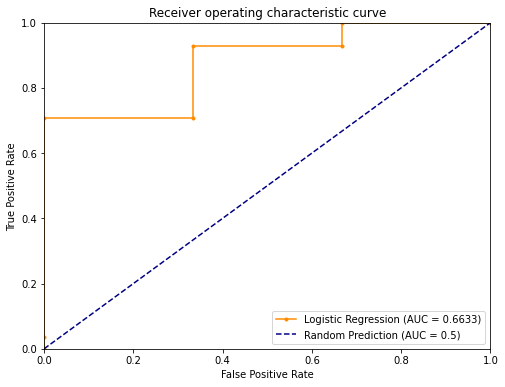

[0.6632996632996633, 0.9932659932659933, 0.9932659932659933]

In [29]:
# Logistic regression
def logistic_regression_model(X_train, X_test, y_train, y_test, param_grid):

    # Create a logistic regression object
    lr = LogisticRegression()

    # Create a GridSearchCV object
    grid_lr = GridSearchCV(lr, param_grid, cv=5, scoring=['roc_auc', 'f1', 'precision'], refit='roc_auc')

    # Fit the GridSearchCV object on the training data
    grid_lr.fit(X_train, y_train)


    # Compute the F1 score for the best model on the testing data
    y_pred = grid_lr.predict(X_test)
    auc_score = roc_auc_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)

    # Plot ROC curve
    y_prob = grid_lr.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)

    print('Best Params: ', grid_lr.best_params_)

    plt.figure(figsize=(8,6))      # format the plot size
    lw = 1.5
    plt.plot(fpr, tpr, color='darkorange', marker='.',
            lw=lw, label='Logistic Regression (AUC = %0.4f)' % auc_score)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--',
            label='Random Prediction (AUC = 0.5)' )
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic curve')
    plt.legend(loc="lower right")
    plt.show()

    # Return the AUC ROC plot and performance measures
    return [auc_score, f1, precision]

lr_param_grid = {'penalty': ['l1', 'l2'],
                'C': np.logspace(-3, 3, 7),
                'solver': ['liblinear'],
                'fit_intercept': [True, False],
                'max_iter': [100, 500, 1000],
                'tol': [1e-4, 1e-3, 1e-2]}

lrm = logistic_regression_model(X_train, X_test, y_train, y_test, lr_param_grid)
lrm

Best Params:  {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


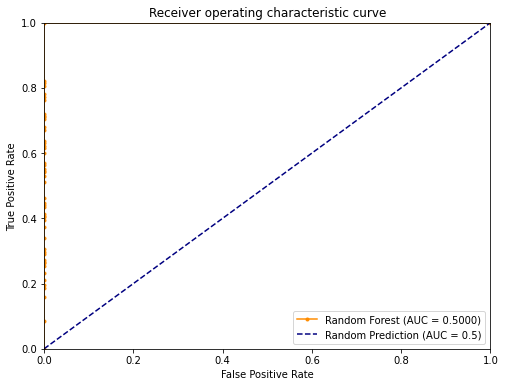

[0.5, 0.9949748743718593, 0.99]

In [30]:
# Random Forest
def random_forest_classifier(X_train, X_test, y_train, y_test, param_grid):
    # Create Random Forest Classifier object
    rf = RandomForestClassifier()
    grid_rf = GridSearchCV(rf, param_grid, cv=5, scoring=['roc_auc', 'f1', 'precision'], refit='roc_auc')
    grid_rf.fit(X_train, y_train)

    # Obtain performance measures
    y_pred = grid_rf.predict(X_test)
    auc_score = roc_auc_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    
    # Plot ROC curve
    y_prob = grid_rf.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)

    print('Best Params: ', grid_rf.best_params_)

    plt.figure(figsize=(8,6))      # format the plot size
    lw = 1.5
    plt.plot(fpr, tpr, color='darkorange', marker='.',
            lw=lw, label='Random Forest (AUC = %0.4f)' % auc_score)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--',
            label='Random Prediction (AUC = 0.5)' )
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic curve')
    plt.legend(loc="lower right")
    plt.show()

    
    # Return the AUC ROC plot and performance measures
    return [auc_score, f1, precision]

rf_param_grid = {
    'n_estimators': [100, 300, 500],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]}

rfm = random_forest_classifier(X_train, X_test, y_train, y_test, rf_param_grid)
rfm

Best Params:  {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 100}


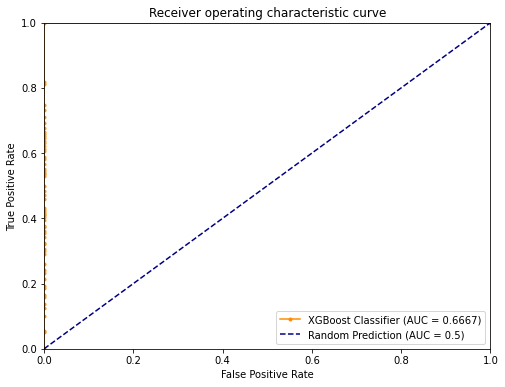

[0.6666666666666667, 0.9966442953020134, 0.9933110367892977]

In [31]:
def xgboost_classifier(X_train, X_test, y_train, y_test, param_grid):

    # Create a XGB Classifier object
    xgb_ = xgb.XGBClassifier()
    grid_xgb = GridSearchCV(xgb_, param_grid, cv=5, scoring=['roc_auc', 'f1', 'precision'], refit='roc_auc')
    grid_xgb.fit(X_train, y_train)
    
    # Obtain performance measures
    y_pred = grid_xgb.predict(X_test)
    auc_score = roc_auc_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    
    # Plot ROC curve
    y_prob = grid_xgb.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)

    print('Best Params: ', grid_xgb.best_params_)

    plt.figure(figsize=(8,6))      # format the plot size
    lw = 1.5
    plt.plot(fpr, tpr, color='darkorange', marker='.',
            lw=lw, label='XGBoost Classifier (AUC = %0.4f)' % auc_score)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--',
            label='Random Prediction (AUC = 0.5)' )
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic curve')
    plt.legend(loc="lower right")
    plt.show()

    # Return the AUC ROC plot and performance measures
    return [auc_score, f1, precision]

param_grid = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 500, 1000]}


xgbm = xgboost_classifier(X_train, X_test, y_train, y_test, param_grid)
xgbm

Fitting 5 folds for each of 81 candidates, totalling 405 fits


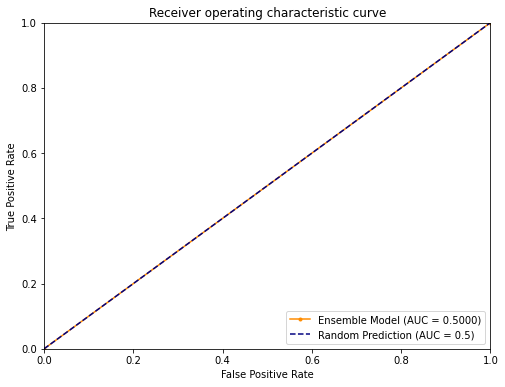

[0.5, 0.9949748743718593, 0.99]

In [32]:
from sklearn import preprocessing
from sklearn import utils

models_ = [('lrm', LogisticRegression()), ('rfm', RandomForestClassifier()), ('xgbm', xgb.XGBClassifier())]

def ensemble_model(X_train, X_test, y_train, y_test, params):

    # Define models
    clf1 = LogisticRegression()
    clf2 = RandomForestClassifier()
    clf3 = xgb.XGBClassifier()
    estimators = [
                ('lr', clf1),
                ('rf', clf2),
                ('xgb', clf3)]
    eclf = VotingClassifier(estimators=estimators)
    grid = GridSearchCV(estimator=eclf, param_grid=params,verbose=2, cv=5,n_jobs=-1)
    grid.fit(X_train, y_train)

    # grid_search.fit(X_train, y_train)

    # Evaluate on test data
    y_pred = grid.predict(X_test)
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    auc_score = roc_auc_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)

    # Plot ROC curve
    plt.figure(figsize=(8,6))      # format the plot size
    lw = 1.5
    plt.plot(fpr, tpr, color='darkorange', marker='.',
            lw=lw, label='Ensemble Model (AUC = %0.4f)' % auc_score)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--',
            label='Random Prediction (AUC = 0.5)' )
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic curve')
    plt.legend(loc="lower right")
    plt.show()

    # Return the AUC ROC plot and performance measures
    return [auc_score, f1, precision]


# Define the models to include in the ensemble
param_grid = {
    'lr__C': [0.1, 1.0, 10.0],
    'rf__n_estimators': [50, 100, 200],
    'xgb__learning_rate': [0.1, 0.01, 0.001],
    'xgb__max_depth': [3, 5, 7]
}



# # Call the ensemble_model function
enm = ensemble_model(X_train,  X_test, y_train, y_test, param_grid)
enm

INFO:tensorflow:Reloading Tuner from 6.18\LendingClubNN\tuner0.json
INFO:tensorflow:Oracle triggered exit
val_auc
10/10 [==============================] - 0s 556us/step


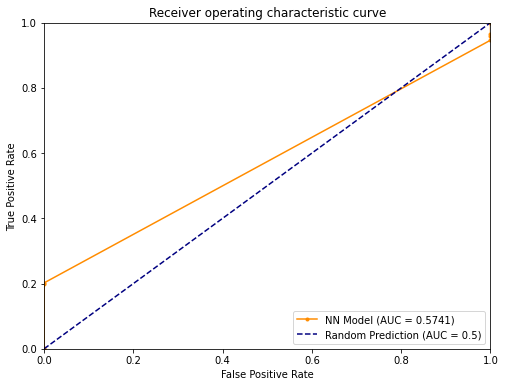

(0.5740740740740741, 0.9932885906040269, 0.9899665551839465)

In [33]:
import kerastuner.tuners as kt

def model_builder(hp):
        model = keras.Sequential()
        model.add(keras.layers.Flatten(input_shape=(165, )))

        # Tune the number of units in the first Dense layer, optimal value between 32-512
        hp_units = hp.Int('units', min_value=32, max_value=512, step=32)
        model.add(keras.layers.Dense(units=hp_units, activation='sigmoid'))
        model.add(keras.layers.Dense(1))

        # Tune the learning rate for the optimizer, optimal value from 0.01, 0.001, or 0.0001
        hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

        model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
                        loss= 'mae',
                        metrics=[tf.keras.metrics.AUC(from_logits=True),tf.keras.metrics.Precision(thresholds=0)])

        return model

def remove_suffix(string):
    """
    Removes a suffix from a string.
    
    Args:
        string (str): A string.
    
    Returns:
        A string with suffix removed.
    """
    if "_" in string:
        parts = string.split("_")
        if len(parts) > 1 and parts[-1].isdigit():
            new_string = "_".join(parts[:-1])
        else:
            new_string = string
    else:
        new_string = string
    return new_string



def fit_nn_model(X_train, X_test, y_train, y_test):

        # Divide training set into training and validation set
        X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.5,random_state=100)

        tuner = kt.Hyperband(
        model_builder, 
        objective = 'loss',
        executions_per_trial = 3,
        directory = '6.18',
        project_name='LendingClubNN'
        )


        # Tune on train/val data
        tuner.search(X_train, 
                y_train, 
                epochs=50, 
                validation_data=(X_val, y_val))

        # Get the optimal hyperparameters
        best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]
        model = tuner.hypermodel.build(best_hps)
        history = model.fit(X_train, y_train, epochs=100, validation_split=0.5, verbose=0)

        auc = 0

        for i in (history.history.keys()):
                if remove_suffix(i) == 'val_auc':
                     print(remove_suffix(i))
                     auc = history.history[i]

        # Tune model based on validation accuracy
        auc_per_epoch = auc
        best_epoch = auc_per_epoch.index(max(auc)) + 1


        # # Reinstantiating models from above
        hypermodel_btc = tuner.hypermodel.build(best_hps)
        hypermodel_btc.fit(X_train, y_train, epochs=best_epoch, validation_split=0.5, verbose =0)

        # Make predictions on the test data
        y_pred_prob = model.predict(X_test)

        # Compute the performance measures
        fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
        auc_score = roc_auc_score(y_test, y_pred_prob)
        f1 = f1_score(y_test, y_pred_prob > 0.5)
        precision = precision_score(y_test, y_pred_prob > 0.5)
        
        print(best_hps)

        plt.figure(figsize=(8,6))      # format the plot size
        lw = 1.5
        plt.plot(fpr, tpr, color='darkorange', marker='.',
                lw=lw, label='NN Model (AUC = %0.4f)' % auc_score)
        plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--',
                label='Random Prediction (AUC = 0.5)' )
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.0])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver operating characteristic curve')
        plt.legend(loc="lower right")
        plt.show()

        return auc_score, f1, precision

nnm = fit_nn_model(X_train, X_test, y_train,  y_test)
nnm


# Model Comparison

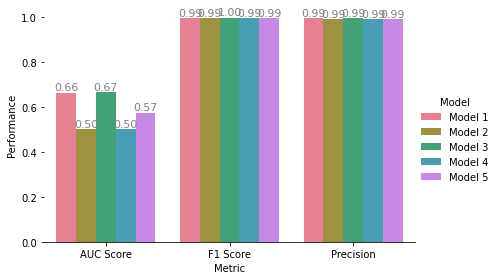

In [34]:
def plot_model_performance(model_list):
    # Create a list of the performance metrics
    metrics = ['AUC Score', 'F1 Score', 'Precision']
    
    # Create a dataframe to hold the performance values for each model
    data = []
    for i, model in enumerate(model_list):
        for j, metric in enumerate(metrics):
            data.append({'Model': 'Model ' + str(i+1), 'Metric': metric, 'Value': model[j]})
    df = pd.DataFrame(data)
    
    # Create the three plots using seaborn
    sns.set_palette(sns.color_palette("husl", len(model_list)))
    g = sns.catplot(x='Metric', y='Value', hue='Model', data=df, kind='bar', height=4, aspect=1.5)
    g.despine(left=True)
    g.set_ylabels('Performance')
    
    # Add labels to the bars
    for ax in g.axes.flat:
        for p in ax.patches:
            ax.annotate("{:.2f}".format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='center', fontsize=11, color='gray', xytext=(0, 5),
                        textcoords='offset points')
    
    plt.show()


model_list = [lrm, rfm, xgbm, enm ,nnm]
plot_model_performance(model_list)

# Determining the best model


In terms of AUC, the best performing models are XGBoost Classifier followed closely by the Logistic Regression model, the F1 and Precision scores seem to have been attenuated by the large imbalance of data. 